In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
#from eli5.sklearn import PermutationImportance

In [2]:
seed = 42

In [3]:
rng = np.random.default_rng(seed=seed)

In [4]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [5]:
data.head()

,compound,inhibition efficiency ZE41 / %,LinIE ZE41,MW,AMW,Mv,Mi,nTA,RBF,nDB,...,CATS3D_06_NL,CATS3D_03_LL,CATS3D_04_LL,CATS3D_05_LL,HOMO / eV,LUMO / eV,Hlgap / eV,Cv / kJ/(mol-K)@293.15K,Cp / kJ/(mol-K)@293.15K,chem_pot / kJ/mol@293.15K
0,3-Amino-124-triazole,-157,0.328,84.10,8.410,0.609,1.199,1.0,0.000,0.0,...,0.0,0.0,0.0,0.0,-5.422,0.078,5.500,0.074309,0.082623,127.67
1,3-methylcatechol,-31,0.693,124.15,7.303,0.620,1.122,3.0,0.000,0.0,...,0.0,1.0,1.0,0.0,-5.311,-0.184,5.127,0.135196,0.143511,269.94
2,3-methylsalicylicacid,75,1.000,152.16,8.008,0.645,1.120,4.0,0.053,1.0,...,0.0,2.0,1.0,0.0,-5.870,-1.812,4.058,0.151551,0.159865,296.04
3,4-aminosalicylicacid,57,0.948,153.15,8.508,0.653,1.132,4.0,0.056,1.0,...,0.0,0.0,0.0,0.0,-5.545,-1.331,4.215,0.152926,0.161240,267.85
4,4-hydroxybenzoicacid,-170,0.290,138.13,8.633,0.670,1.117,3.0,0.063,1.0,...,0.0,0.0,0.0,0.0,-6.198,-1.472,4.726,0.132298,0.140612,225.54


In [6]:
data.describe()

,inhibition efficiency ZE41 / %,LinIE ZE41,MW,AMW,Mv,Mi,nTA,RBF,nDB,nAB,...,CATS3D_06_NL,CATS3D_03_LL,CATS3D_04_LL,CATS3D_05_LL,HOMO / eV,LUMO / eV,Hlgap / eV,Cv / kJ/(mol-K)@293.15K,Cp / kJ/(mol-K)@293.15K,chem_pot / kJ/mol@293.15K
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,-35.766667,0.678900,137.143667,8.309200,0.623217,1.142567,3.500000,0.101417,1.350000,3.083333,...,0.083333,0.350000,0.300000,0.133333,-6.256283,-1.014233,5.19410,0.137386,0.145701,252.594167
std,86.719764,0.251337,37.218170,1.724995,0.065797,0.022984,1.651912,0.081858,1.117276,3.411306,...,0.461819,1.086512,1.030057,0.566484,0.627792,1.220368,0.97891,0.041468,0.041468,109.972648
min,-270.000000,0.000000,46.030000,5.160000,0.485000,1.084000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7.610000,-3.401000,3.24500,0.035745,0.044059,21.580000
25%,-108.000000,0.470000,116.897500,7.508750,0.577250,1.124500,2.750000,0.051750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.675750,-1.812750,4.46050,0.109422,0.117736,192.445000
50%,-6.000000,0.765000,138.130000,8.364000,0.632500,1.145000,4.000000,0.071000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.193000,-1.153500,5.03550,0.140831,0.149146,245.535000
75%,37.250000,0.890750,157.950000,8.897250,0.667750,1.158000,4.000000,0.167000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,-5.902750,-0.309500,5.81450,0.152617,0.160931,297.990000
max,75.000000,1.000000,228.130000,16.697000,0.845000,1.203000,7.000000,0.286000,5.000000,12.000000,...,3.000000,7.000000,7.000000,3.000000,-4.496000,1.687000,7.38200,0.256640,0.264954,627.630000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 1263 entries, compound to chem_pot / kJ/mol@293.15K
dtypes: float64(1261), int64(1), object(1)
memory usage: 592.2+ KB


In [8]:
columns = data.columns

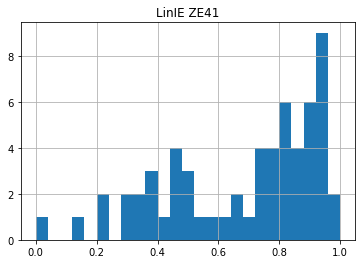

In [9]:
fig, ax = plt.subplots()
data.hist(column = columns[2], bins=25, ax=ax)
#ax.plot([0.68, 0.68], [0, 8], 'r-')
plt.show()

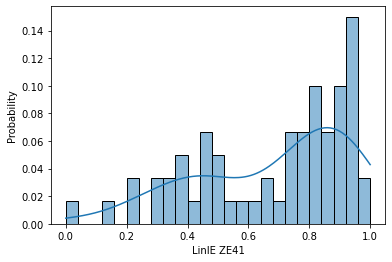

In [10]:
fig, ax = plt.subplots()
sns.histplot(data[columns[2]], bins=25, ax = ax, kde=True, stat='probability')
plt.show()

In [14]:
for idx in [0, 5, 36, 45, 13, 54]:
    print(data[data.index == idx]['inhibition efficiency ZE41 / %'])

0   -157
Name: inhibition efficiency ZE41 / %, dtype: int64
5    39
Name: inhibition efficiency ZE41 / %, dtype: int64
36    12
Name: inhibition efficiency ZE41 / %, dtype: int64
45   -6
Name: inhibition efficiency ZE41 / %, dtype: int64
13    38
Name: inhibition efficiency ZE41 / %, dtype: int64
54   -17
Name: inhibition efficiency ZE41 / %, dtype: int64
